In [63]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
population = pd.read_csv("sle_pop_2020_2025.csv")
gdf = gpd.read_file("who_shapefile_sle_adm2_latest.gpkg")

<h2>Data Exploration </h2>

In [29]:
population.head(40)

,adm0,adm1,adm2,year,pop
0,SIERRA LEONE,EASTERN,KAILAHUN,2020,"567,273"
1,SIERRA LEONE,EASTERN,KAILAHUN,2021,578618
2,SIERRA LEONE,EASTERN,KAILAHUN,2023,6O1994
3,SIERRA LEONE,EASTERN,KAILAHUN,2025,626315
4,SIERRA LEONE,EASTERN,KENEMA,2020,816136
5,SIERRA LEONE,EASTERN,KENEMA,2021,832459
6,SIERRA LEONE,EASTERN,KENEMA,2023,866090
7,SIERRA LEONE,EASTERN,KENEMA,2025,901080
8,SIERRA LEONE,EASTERN,KONO,2020,340632
9,SIERRA LEONE,EASTERN,KONO,2021,347445


In [16]:
#########Explore the data types for the various features
population.info()
#Check the missing values values in columns.  
population.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   adm0    58 non-null     object
 1   adm1    58 non-null     object
 2   adm2    56 non-null     object
 3   year    58 non-null     int64 
 4   pop     58 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


adm0    0
adm1    0
adm2    2
year    0
pop     0
dtype: int64

On inspecting the data, there appears to be atypo in the third instance where the population size is 6O1994, most likely it was supposed to be a 0 not O. Also, the population coumn should be numeric.There are inconsistencies with commas as well, some population values have commas and most don't have. The 20th and 27th row have very huge values that appear unrealistic, so I drop them.

In [30]:
# Remove commas, replace letter 'O' with '0', convert to numeric
population['pop'] = (
    population['pop']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('O', '0', regex=False)
)
#Convert population to numeric
population['pop'] = pd.to_numeric(population['pop'], errors='coerce')


In [35]:
population.drop(index=[20, 27], inplace=True)

In [44]:
##Confirm the cleaning changes 
population.head(4)


,adm0,adm1,adm2,year,pop
0,SIERRA LEONE,EASTERN,KAILAHUN,2020,567273
1,SIERRA LEONE,EASTERN,KAILAHUN,2021,578618
2,SIERRA LEONE,EASTERN,KAILAHUN,2023,601994
3,SIERRA LEONE,EASTERN,KAILAHUN,2025,626315


In [48]:
#Check Duplicates
# --- 7. Check for Duplicates or Inconsistencies ---
duplicates = population.duplicated(subset=['adm0', 'adm1', 'adm2', 'year']).sum()
print(duplicates)

2


In [51]:
#Drop duplicates
population.drop_duplicates(inplace=True)

In [ ]:
###Explore the different regions in the data

In [15]:
gdf.head()

,adm0_code,adm0,adm1,adm2,start_date,end_date,geometry
0,SLE,SIERRA LEONE,SOUTHERN,BO,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.86631 7.53559, -11.86275 7..."
1,SLE,SIERRA LEONE,NORTHERN,BOMBALI,2000-01-01,9999/12/31,"MULTIPOLYGON (((-12.10832 8.66434, -12.10575 8..."
2,SLE,SIERRA LEONE,SOUTHERN,BONTHE,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.95411 7.20018, -11.94957 7..."
3,SLE,SIERRA LEONE,EASTERN,KAILAHUN,2000-01-01,9999/12/31,"MULTIPOLYGON (((-10.80489 7.61595, -10.80203 7..."
4,SLE,SIERRA LEONE,NORTHERN,KAMBIA,2000-01-01,9999/12/31,"MULTIPOLYGON (((-12.93101 8.91424, -12.92511 8..."


The data has four columns, whereby the adm2 variable has 2 NAs


In [52]:
##Remove the missing values in the adm2 column
population = population.dropna()

In [53]:
####Confirm that the csv file has no more missing values.
population.isna().sum()

adm0    0
adm1    0
adm2    0
year    0
pop     0
dtype: int64

In [54]:
##Explore the shapefile data.
gdf.isna().sum()
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   adm0_code   14 non-null     object        
 1   adm0        14 non-null     object        
 2   adm1        14 non-null     object        
 3   adm2        14 non-null     object        
 4   start_date  14 non-null     datetime64[ms]
 5   end_date    14 non-null     object        
 6   geometry    14 non-null     geometry      
dtypes: datetime64[ms](1), geometry(1), object(5)
memory usage: 916.0+ bytes


In [55]:
# Ensure that the column names for both files have the same case and there is no space in the names
population.columns = population.columns.str.lower().str.strip()
gdf.columns = gdf.columns.str.lower().str.strip()

In [56]:
#Remove the whitespace from the administrative names
for df in [population, gdf]:
    for col in ['adm0', 'adm1', 'adm2']:
        df[col] = df[col].astype(str).str.strip().str.upper()


In [57]:
#Merge the two clean data frames based on adm0, adm1, adm2 because they are the common columns in both dataframes
merged = gdf.merge(population, on=['adm0', 'adm1', 'adm2'], how='left')

In [58]:
#View the merged dataset
merged.head()

,adm0_code,adm0,adm1,adm2,start_date,end_date,geometry,year,pop
0,SLE,SIERRA LEONE,SOUTHERN,BO,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.86631 7.53559, -11.86275 7...",2020,834700
1,SLE,SIERRA LEONE,SOUTHERN,BO,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.86631 7.53559, -11.86275 7...",2021,851394
2,SLE,SIERRA LEONE,SOUTHERN,BO,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.86631 7.53559, -11.86275 7...",2023,885790
3,SLE,SIERRA LEONE,SOUTHERN,BO,2000-01-01,9999/12/31,"MULTIPOLYGON (((-11.86631 7.53559, -11.86275 7...",2025,921576
4,SLE,SIERRA LEONE,NORTHERN,BOMBALI,2000-01-01,9999/12/31,"MULTIPOLYGON (((-12.10832 8.66434, -12.10575 8...",2020,579583


In [59]:
#Confirm that the erged dataframe has no missing values
merged.isna().sum()

adm0_code     0
adm0          0
adm1          0
adm2          0
start_date    0
end_date      0
geometry      0
year          0
pop           0
dtype: int64

Compute population growth

In [60]:
growth_summary = (
    merged.groupby(['adm1', 'adm2'])
    .agg(
        min_year=('year', 'min'),
        max_year=('year', 'max'),
        start_pop=('pop', 'first'),
        end_pop=('pop', 'last'),
        avg_pop=('pop', 'mean'),
        growth_percent=('pop', lambda x: (x.max() - x.min()) / x.min() * 100)
    )
    .reset_index()
)

In [61]:
print(growth_summary.head())

       adm1      adm2  min_year  max_year  start_pop  end_pop    avg_pop  \
0   EASTERN  KAILAHUN      2020      2025     567273   626315  593550.00   
1   EASTERN    KENEMA      2020      2025     816136   901080  853941.25   
2   EASTERN      KONO      2020      2025     340632   376086  356411.25   
3  NORTHERN   BOMBALI      2020      2025     579583   639906  606430.50   
4  NORTHERN    KAMBIA      2020      2025     413430   456461  430530.00   

   growth_percent  
0       10.408040  
1       10.408069  
2       10.408300  
3       10.408000  
4       10.408292  


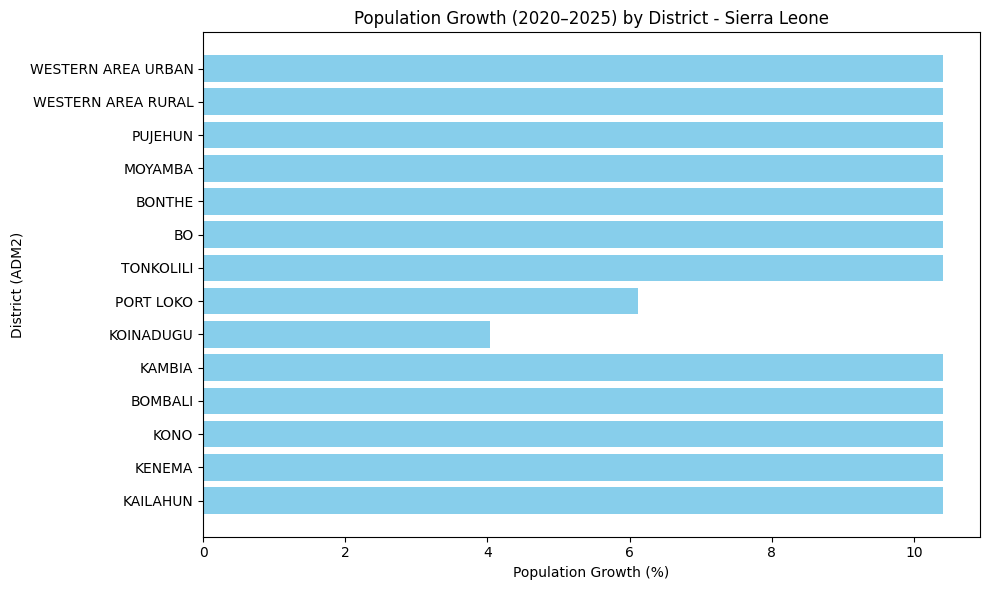

In [64]:
#Represent the population growth by district
plt.figure(figsize=(10, 6))
plt.barh(growth_summary['adm2'], growth_summary['growth_percent'], color='skyblue')
plt.xlabel('Population Growth (%)')
plt.ylabel('District (ADM2)')
plt.title('Population Growth (2020–2025) by District - Sierra Leone')
plt.tight_layout()
plt.show()

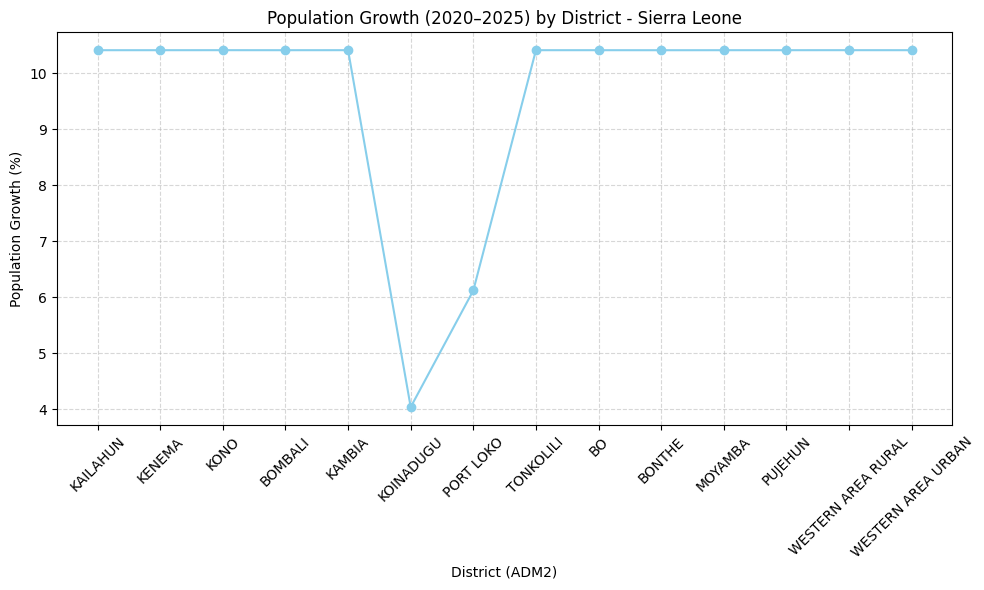

In [66]:
#Lineplot
plt.figure(figsize=(10, 6))
plt.plot(growth_summary['adm2'], growth_summary['growth_percent'], marker='o', linestyle='-', color='skyblue')
plt.xticks(rotation=45)  # rotate x-axis labels for readability
plt.xlabel('District (ADM2)')
plt.ylabel('Population Growth (%)')
plt.title('Population Growth (2020–2025) by District - Sierra Leone')
plt.grid(True, linestyle='--', alpha=0.5)  # optional: add grid
plt.tight_layout()
plt.show()


In [65]:
#Save the cleaned population data and also the population growth summary report.
df.to_csv("clean_sle_pop_2020_2025.csv", index=False)
growth_summary.to_csv("sle_pop_growth_summary.csv", index=False)